In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
import pandas as pd



In [1]:
# this is node that this notebook is running on
!hostname

h34n18


In [3]:
# this is where the python from
!which python

/ccs/home/fwang2/.conda/envs/wm1/bin/python


In [4]:
# this is what kernels are available
!jupyter kernelspec list

Available kernels:
  python3    /ccs/home/fwang2/.conda/envs/wm1/share/jupyter/kernels/python3


In [3]:
# this is to check TF version we have
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
print(np.__file__)
import tensorflow as tf
print(tf.__version__)

/ccs/home/fwang2/.conda/envs/wm1/lib/python3.6/site-packages/numpy/__init__.py
2.1.0


In [4]:
# offline: I did 
# pip install tensorflow-datasets
import tensorflow_datasets as tfds

In [11]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:4', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:5', device_type='GPU')]

# Build a model

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# Scaling MNIST data from (0, 255] to (0., 1.]
def scale(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255
  return image, label

datasets, info = tfds.load(name='mnist',
                           with_info=True,
                           as_supervised=True)
train_datasets_unbatched = datasets['train'].map(scale).shuffle(BUFFER_SIZE)
train_datasets = train_datasets_unbatched.batch(BATCH_SIZE)

Label: 5


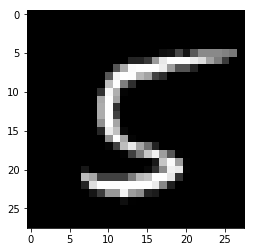

In [6]:
import matplotlib.pyplot as plt
mnist_example = train_datasets_unbatched.take(1)
image = None
for example in mnist_example:
    image = np.squeeze(example[0].numpy())
    label = example[1].numpy()
print("Label:", label)
plt.imshow(image, cmap='gray')

In [7]:
 def build_and_compile_cnn_model():
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(
      loss=tf.keras.losses.sparse_categorical_crossentropy,
      optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
      metrics=['accuracy'])
  return model

In [8]:
single_worker_model = build_and_compile_cnn_model();
single_worker_model.fit(x=train_datasets, epochs=5);

Epoch 1/5
938/938 [==============================] - 18s 19ms/step - loss: 2.1056 - accuracy: 0.4456
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 1.2103 - accuracy: 0.7780
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.6270 - accuracy: 0.8502
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.4743 - accuracy: 0.8751
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.4123 - accuracy: 0.8869
